In [2]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
df = pd.read_csv("data/cars.csv", delimiter=";")
df[-5:]

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
45,2011,16089528,8113111,389435,219906,2611104,728458,2527190,34116,NaN,1466208
46,2012,17033413,8648875,396119,235949,2794606,751650,2657722,33071,NaN,1515421
47,2013,17939447,9283923,421848,219885,2933050,755950,2722826,36148,NaN,1565817
48,2014,18828721,9857915,427264,211200,3062479,773728,2828466,40731,NaN,1626938
49,2015,19882069,10509258,446822,216566,3235304,802615,2938821,45138,NaN,1687545


In [3]:
def prepareX(X, order=1):
    return np.hstack([np.power(X, i) for i in range(order + 1)])

In [4]:
def linreq_np(X, Y, order):
    w, e, r, s = np.linalg.lstsq(X, Y)
    return w

def linreq_sysequation(X, Y, order):
    return (X.T * X).I * X.T * Y

def linreq_gradient(X, Y, order):
    N = X.shape[0]
    D = X.shape[1]
    
    maxIteration = 50000
    eta = 0.0002
    theta = np.zeros((D, 1))
    prev_error = np.infty
    
    for i in range(maxIteration):
        error = np.power(X * theta - y, 2).sum()
        gradient = X.T * (X * theta - y) / N
        theta = theta - eta * gradient
        if prev_error * 0.99999 < error:
            break
        prev_error = error

    return theta

In [84]:
def predict(X, model):
    for i in X:
        prediction = i * model
        print("prediction of {} is {}".format(i, prediction))
        
def test(X, Y, trainer, **kwargs):
    order = kwargs.get("order", 1)
    X = prepareX(X, order)
    model = trainer(X, Y, order)
    
    # plot original data
    plt.plot(X[:,1], Y, "rx")
    
    # plot model
    xTest = np.linspace(
        int(X[:,1][0] - 10), 
        int(X[:,1][-1] + 20), 
        int(X[:,1][-1] - X[:,1][0]) * 2)
    xTest = prepareX(np.matrix(xTest).T, order)
    
    plt.title(kwargs.get("title", ""))
    plt.plot(xTest[:,1], xTest * model, "b-")
    plt.grid(True)

    predict(prepareX(predictX, order), model)
    
    return model
    
x = np.mat(df.Year).T - 1965
y = np.mat(df.Car).T / 1000000.

predictX=np.mat([2012, 2025, 2050]).T - 1965

prediction of [[ 1 47]] is [[ 7.24749403]]
prediction of [[ 1 60]] is [[ 9.77629299]]
prediction of [[ 1 85]] is [[ 14.6393679]]


matrix([[-1.89508682],
        [ 0.194523  ]])

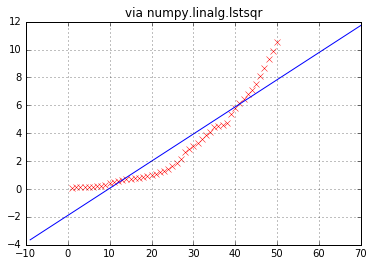

In [83]:
test(x, y, linreq_np, title="via numpy.linalg.lstsqr", predictX=predictX)

prediction of [[ 1 47]] is [[ 7.24749403]]
prediction of [[ 1 60]] is [[ 9.77629299]]
prediction of [[ 1 85]] is [[ 14.6393679]]


matrix([[-1.89508682],
        [ 0.194523  ]])

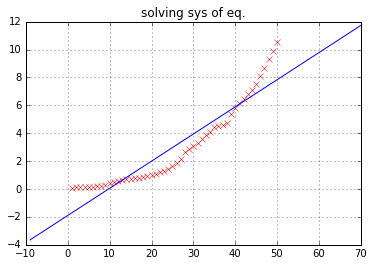

In [78]:
test(x, y, linreq_sysequation, title="solving sys of eq.", predictX=predictX)

prediction of [[ 1 47]] is [[ 6.96830669]]
prediction of [[ 1 60]] is [[ 9.2250919]]
prediction of [[ 1 85]] is [[ 13.56506344]]


matrix([[-1.19083981],
        [ 0.17359886]])

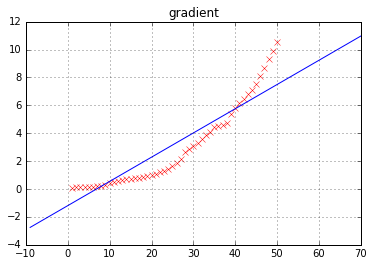

In [79]:
test(x, y, linreq_gradient, title="gradient", predictX=predictX)

prediction of [[   1   47 2209]] is [[ 8.61474127]]
prediction of [[   1   60 3600]] is [[ 15.06226459]]
prediction of [[   1   85 7225]] is [[ 32.57506787]]


matrix([[ 0.48413869],
        [-0.08000302],
        [ 0.00538286]])

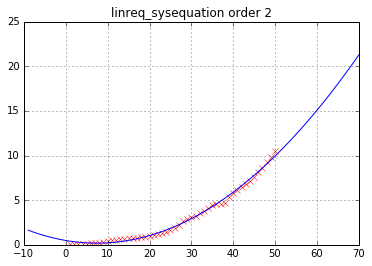

In [80]:
test(x, y, linreq_sysequation, order=2, title="linreq_sysequation order 2", predictX=predictX)

prediction of [[     1     47   2209 103823]] is [[ 8.71827107]]
prediction of [[     1     60   3600 216000]] is [[ 16.60901103]]
prediction of [[     1     85   7225 614125]] is [[ 42.92877357]]


matrix([[  9.78231253e-02],
        [  6.63461050e-03],
        [  1.17768645e-03],
        [  5.49696299e-05]])

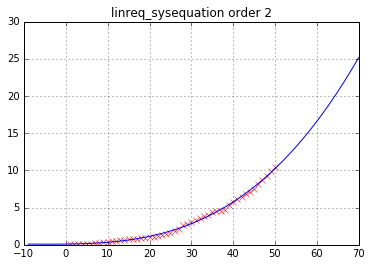

In [81]:
test(x, y, linreq_sysequation, order=3, title="linreq_sysequation order 2", predictX=predictX)

prediction of [[   1   47 2209]] is [[ 8.61474127]]
prediction of [[   1   60 3600]] is [[ 15.06226459]]
prediction of [[   1   85 7225]] is [[ 32.57506787]]


matrix([[ 0.48413869],
        [-0.08000302],
        [ 0.00538286]])

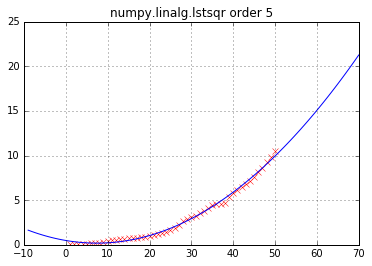

In [82]:
test(x, y, linreq_np, order=2, title="numpy.linalg.lstsqr order 5", predictX=predictX)

prediction of [[     1     47   2209 103823]] is [[ 8.71827107]]
prediction of [[     1     60   3600 216000]] is [[ 16.60901103]]
prediction of [[     1     85   7225 614125]] is [[ 42.92877357]]


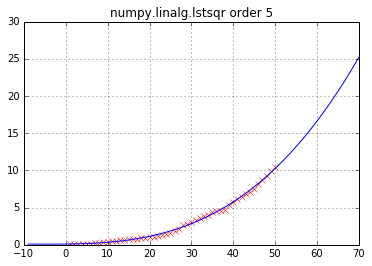

In [171]:
def findSlopeAt(X, Y, slopeAt, order):
    model = test(
        X, Y, linreq_np, order=order, 
        title="numpy.linalg.lstsqr order 5", predictX=predictX)
    
    der = np.polyder(model.T.A[0][::-1], order - 2)
    
    xTest = np.linspace(
        int(X[:,0][0] - 1), 
        int(X[:,0][-1] + 2), 
        int(X[:,0][-1] - X[:,0][0]) * 2)
    
    xTest = prepareX(np.matrix(xTest).T, 3)
    #plt.plot(xTest[:,1], xTest[:,1:] * np.mat(der).T, "g-")

findSlopeAt(x, y, 60, 3)